In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

### Generacion de Datos

(150, 2)


<function matplotlib.pyplot.show(*args, **kw)>

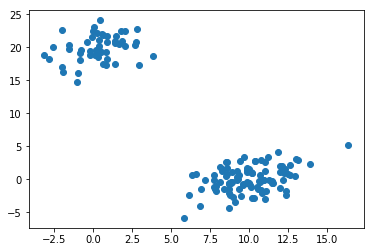

In [4]:
np.random.seed(4711)
x=np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[100,])
y=np.random.multivariate_normal([0,20],[[3,1],[1,4]],size=[50,])
datos=np.concatenate((x,y))
print(datos.shape) #datos(x,y)
plt.scatter(datos[:,0],datos[:,1])
plt.show

### Generacion de Clusters

In [5]:
z=linkage(datos,'ward')
z #array([[ id_usuario , id_usuario , distancia , #elementos_en_cluster ]])

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [7]:
c,coeph_dist=cophenet(z,pdist(datos)) #certeza de los closters
c

0.9800148387574268

### Resaltar Clusters

In [8]:
z[152-len(datos)] #Conocer los ids que componen la posicion 152 del array de clusterings(z)

array([33.        , 68.        ,  0.07106779,  2.        ])

<function matplotlib.pyplot.show(*args, **kw)>

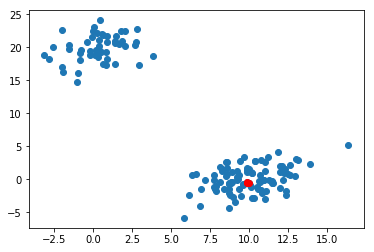

In [9]:
id_datos=[62,33,68]
plt.scatter(datos[:,0],datos[:,1])
plt.scatter(datos[id_datos,0],datos[id_datos,1],c='r')
plt.show

### Representacion grafica de Dendograma

<function matplotlib.pyplot.show(*args, **kw)>

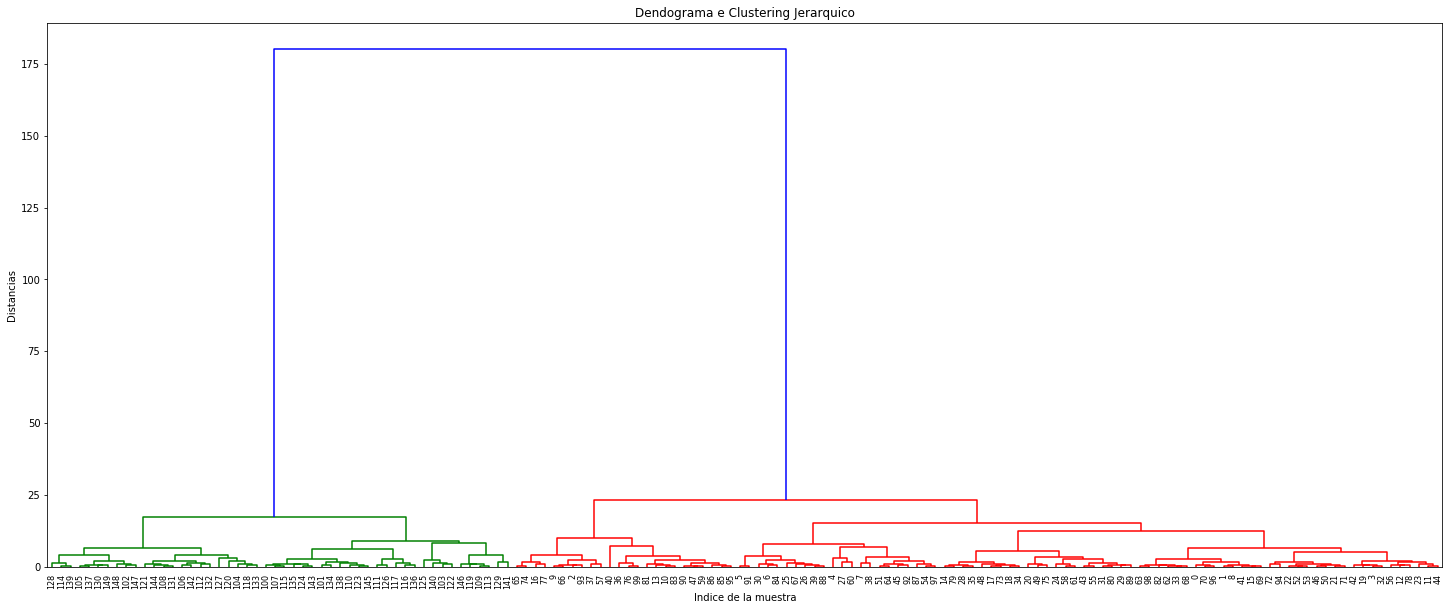

In [10]:
plt.figure(figsize=(25,10))
plt.title('Dendograma e Clustering Jerarquico')
plt.xlabel('Indice de la muestra')
plt.ylabel('Distancias')
dendrogram(z,leaf_font_size=8)
plt.show

### Representacion grafica de Dendograma Truncado

<function matplotlib.pyplot.show(*args, **kw)>

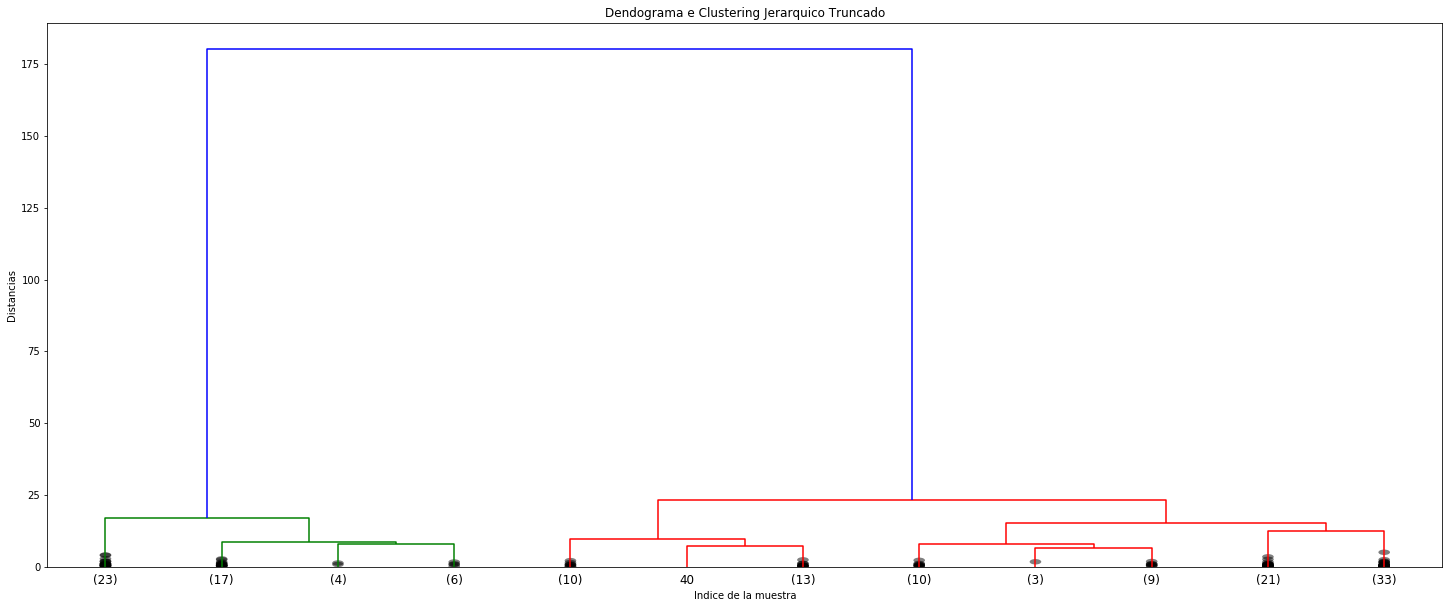

In [11]:
plt.figure(figsize=(25,10))
plt.title('Dendograma e Clustering Jerarquico Truncado')
plt.xlabel('Indice de la muestra')
plt.ylabel('Distancias')
dendrogram(z,truncate_mode='lastp',p=12,show_contracted=True)
plt.show

### Obtener el numero optimo de clusters (Metodo del codo)

In [44]:
z2=z[:,2] #se obtienen todas las distancias de los clusters calculados

def max_diff(dist_clusters):
    diff_clusters=np.diff(dist_clusters)
    max=0
    for index_i,i in enumerate(diff_clusters):
        if(i>max):
            max=i
            idx=index_i
        for index_j,j in enumerate(diff_clusters):
            if(j>max):
                max=j
                idx=index_j
    return (dist_clusters[idx])

max_d=round(max_diff(z2),2)
max_d

23.12

In [34]:
from scipy.cluster.hierarchy import fcluster

In [45]:
clusters=fcluster(z,max_d,criterion='distance')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

<function matplotlib.pyplot.show(*args, **kw)>

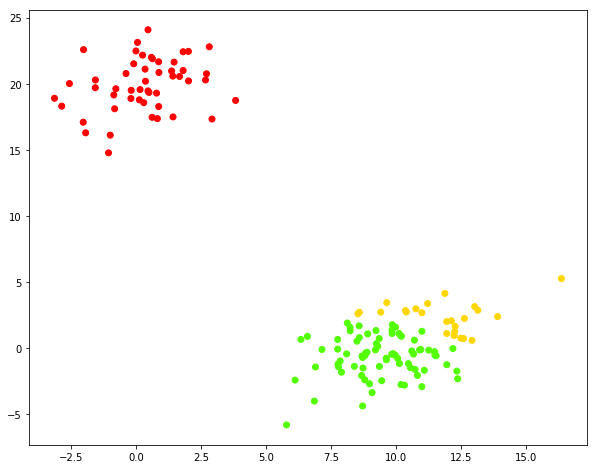

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(datos[:,0],datos[:,1],c=clusters,cmap='prism')
plt.show